In [73]:
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np

In [74]:
logs_err = pda.read_csv('../Data/241016_LogETLError.csv', sep=';', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})
logs = pda.read_csv('../Data/241016_LogETL.csv',sep=';')

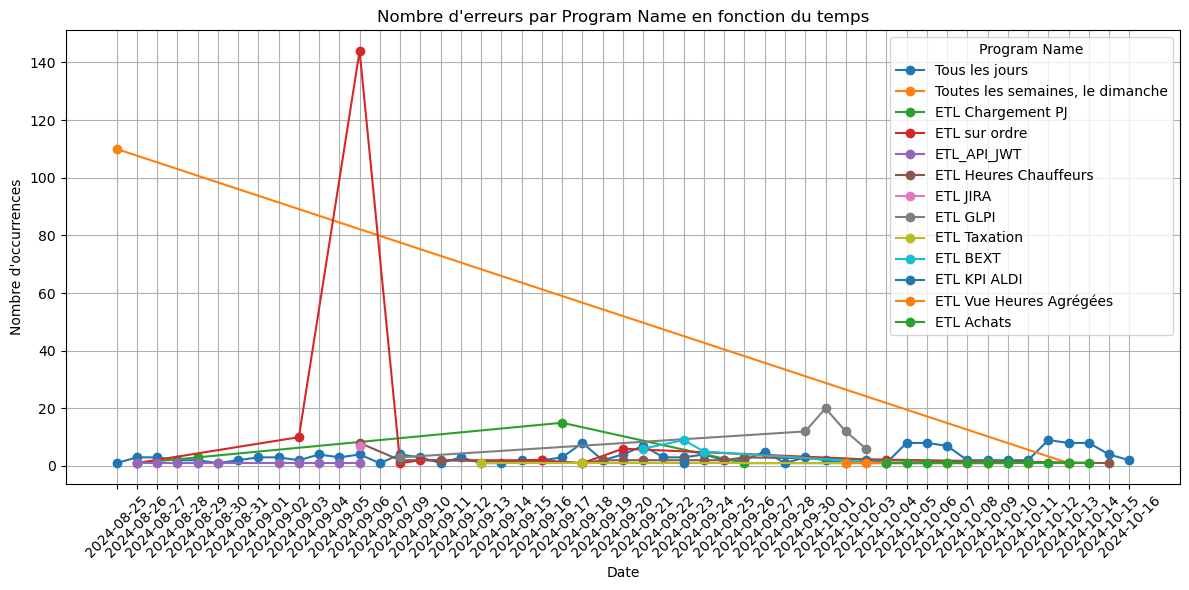

In [75]:
# Filtrer pour enlever le point du 2024-08-29 et 2024-10-03 pour Program_Name "ETL sur ordre"
logs_err = logs_err[~((logs_err['Date'] == '2024-08-29') & (logs_err['Program_Name'] == 'ETL sur ordre'))]
logs_err = logs_err[~((logs_err['Date'] == '2024-10-03') & (logs_err['Program_Name'] == 'ETL sur ordre'))]

# Compter le nombre d'occurrences de chaque Program_Name par date
counts = logs_err.groupby(['Date', 'Program_Name']).size().reset_index(name='Count')

# Tracer le nombre de Program_Name en fonction du temps
plt.figure(figsize=(12, 6))
for program_name in counts['Program_Name'].unique():
    subset = counts[counts['Program_Name'] == program_name]
    plt.plot(subset['Date'], subset['Count'], marker='o', label=program_name)

plt.title("Nombre d'erreurs par Program Name en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Pour que les dates soient lisibles
plt.legend(title='Program Name')
plt.grid(True)
plt.tight_layout()  # Ajuste les marges
plt.show()

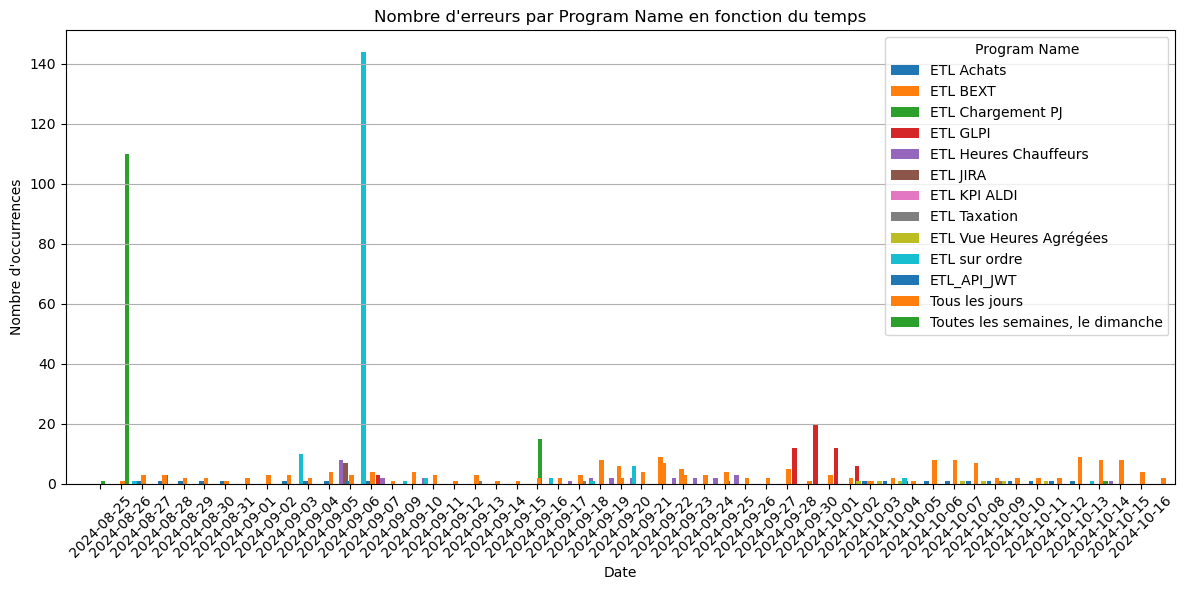

In [76]:
# Filtrer pour enlever le point du 2024-08-29 et 2024-10-03 pour Program_Name "ETL sur ordre"
logs_err = logs_err[~((logs_err['Date'] == '2024-08-29') & (logs_err['Program_Name'] == 'ETL sur ordre'))]
logs_err = logs_err[~((logs_err['Date'] == '2024-10-03') & (logs_err['Program_Name'] == 'ETL sur ordre'))]

# Compter le nombre d'occurrences de chaque Program_Name par date
counts = logs_err.groupby(['Date', 'Program_Name']).size().reset_index(name='Count')

# Créer un tableau pivot pour faciliter le traçage
pivot_counts = counts.pivot(index='Date', columns='Program_Name', values='Count').fillna(0)

# Tracer le nombre d'erreurs par Program_Name en fonction du temps avec des barres
plt.figure(figsize=(12, 6))
pivot_counts.plot(kind='bar', width=2.8, ax=plt.gca())

# Réglages des axes
plt.title("Nombre d'erreurs par Program Name en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Pour que les dates soient lisibles
plt.legend(title='Program Name')
plt.grid(axis='y')
plt.tight_layout()  # Ajuste les marges
plt.show()

In [66]:
print (len(logs_err['Date']))
logs_err['Date'].value_counts()

610


Date
2024-09-06    164
2024-08-25    111
2024-10-01     22
2024-09-17     18
2024-09-30     15
2024-09-23     15
2024-09-21     15
2024-10-02     14
2024-09-03     13
2024-09-20     12
2024-09-24     11
2024-10-13     11
2024-09-18     11
2024-09-09     10
2024-10-12     10
2024-10-14      9
2024-10-03      9
2024-10-05      9
2024-10-07      9
2024-10-06      9
2024-08-26      6
2024-09-26      6
2024-10-04      6
2024-08-29      6
2024-09-04      5
2024-09-27      5
2024-10-09      5
2024-09-10      5
2024-10-15      5
2024-10-10      4
2024-10-11      4
2024-08-27      4
2024-10-08      4
2024-09-25      4
2024-09-16      4
2024-09-05      4
2024-09-02      4
2024-09-19      4
2024-09-22      3
2024-09-11      3
2024-09-01      3
2024-08-28      3
2024-09-12      3
2024-09-13      2
2024-10-16      2
2024-09-15      2
2024-08-31      2
2024-08-30      2
2024-09-14      1
2024-09-07      1
2024-09-28      1
Name: count, dtype: int64

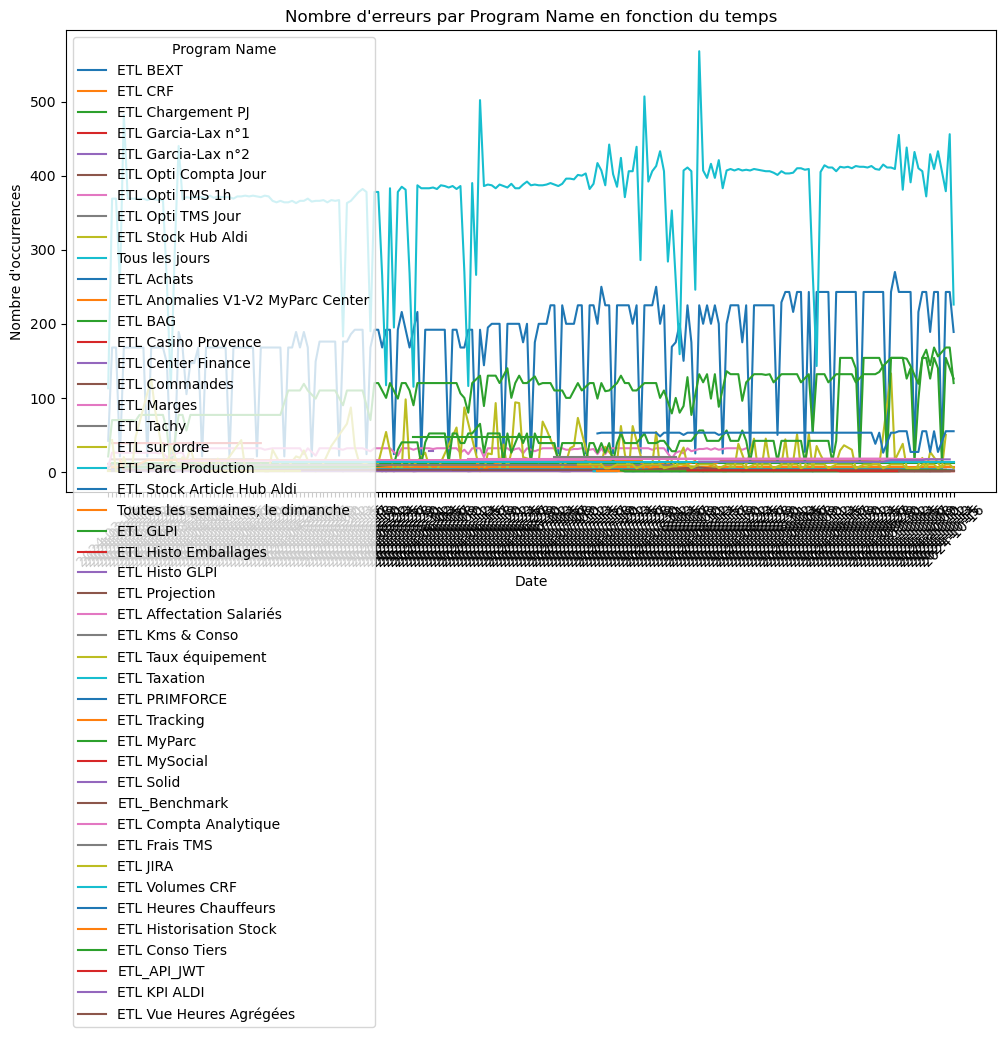

In [77]:
import matplotlib.pyplot as plt

# Enlève les lignes où Date est NaN
logs = logs.dropna(subset=['Date']) 

# Compter le nombre d'occurrences de chaque Program_Name par date
counts = logs.groupby(['Date', 'Program_Name']).size().reset_index(name='Count')

# Tracer le nombre de Program_Name en fonction du temps
plt.figure(figsize=(12, 6))
for program_name in counts['Program_Name'].unique():
    subset = counts[counts['Program_Name'] == program_name]
    plt.plot(subset['Date'], subset['Count'], marker='', label=program_name)

plt.title("Nombre d'execution sans erreur par Program Name en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Pour que les dates soient lisibles
plt.legend(title='Program Name')
plt.grid(False)
#plt.tight_layout()  # Ajuste les marges
plt.show()